## Importing Libraries

In [3]:
import pandas as pd #data manipulation
import numpy as np #Numerical Analysis
import seaborn as sns #data visualization
import json #for reading json object
import matplotlib.pyplot as plt #data visualization
import pickle # For saving the model file
from wordcloud import WordCloud #to create word clouds
from ast import literal_eval #to evaluate the string as pyhton expression


## Loading the data sets

In [4]:
credits=pd.read_csv("tmdb_5000_credits.csv")
movies_df=pd.read_csv("tmdb_5000_movies.csv")

## Exploring the data

In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
credits.shape

(4803, 4)

In [7]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
movies_df.shape

(4803, 20)

In [9]:
print("credits:",credits.columns)

credits: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [10]:
print("movies:",movies_df.columns)

movies: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


## Merging the data sets

In [11]:
credits_column_renamed=credits.rename(index=str,columns={"movie_id":"id"})
movies=movies_df.merge(credits_column_renamed,on="id")

In [12]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [13]:
movies.shape

(4803, 23)

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [15]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## converting json to strings

In [16]:
# changing the crew column from json to string    
movies['crew'] = movies['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
movies['crew'] = movies['crew'].apply(director)
movies.rename(columns={'crew':'director'},inplace=True)
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",James Cameron
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Gore Verbinski
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Sam Mendes
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christopher Nolan
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Andrew Stanton


In [17]:
from ast import literal_eval
features = ['keywords','genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)


In [18]:
# Returns the top 1 element or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 1:
            names = names[:1]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [19]:
print (type(movies.loc[0, 'genres']))

<class 'list'>


In [20]:
features = ['keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [21]:
movies['genres']

0            [Action]
1         [Adventure]
2            [Action]
3            [Action]
4            [Action]
            ...      
4798         [Action]
4799         [Comedy]
4800         [Comedy]
4801               []
4802    [Documentary]
Name: genres, Length: 4803, dtype: object

In [22]:
movies['genres']  = movies['genres'] .str.join(', ')

In [23]:
movies['genres']

0            Action
1         Adventure
2            Action
3            Action
4            Action
           ...     
4798         Action
4799         Comedy
4800         Comedy
4801               
4802    Documentary
Name: genres, Length: 4803, dtype: object

In [24]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director
0,237000000,Action,http://www.avatarmovie.com/,19995,[culture clash],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",James Cameron
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,[ocean],en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Gore Verbinski
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,[spy],en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Sam Mendes
3,250000000,Action,http://www.thedarkknightrises.com/,49026,[dc comics],en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christopher Nolan
4,260000000,Action,http://movies.disney.com/john-carter,49529,[based on novel],en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Andrew Stanton


In [25]:
#corr() is to find the relationship between the columns
movies.corr()

C:\Users\SREE\AppData\Local\Temp\ipykernel_9976\3070329815.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.corr()


,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


In [26]:
movies.isnull().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title_x                 False
vote_average            False
vote_count              False
title_y                 False
cast                    False
director                 True
dtype: bool

In [27]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
director                  30
dtype: int64

<Axes: >

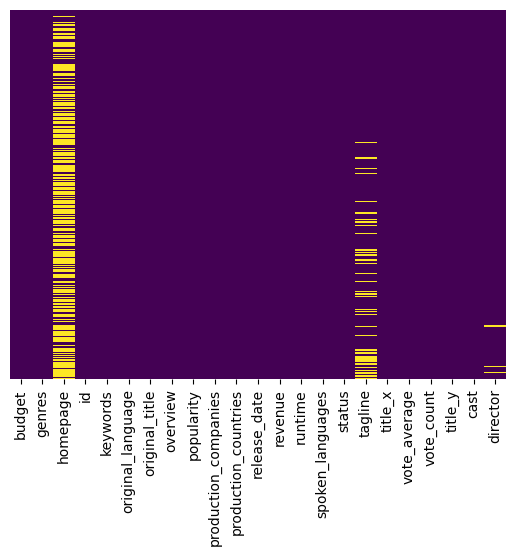

In [28]:
sns.heatmap(movies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
#Dropping the null values
movies = movies.dropna(subset = ['runtime'])

In [30]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3089
id                         0
keywords                   0
original_language          0
original_title             0
overview                   1
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  842
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
director                  30
dtype: int64

In [31]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director
0,237000000,Action,http://www.avatarmovie.com/,19995,[culture clash],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",James Cameron
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,[ocean],en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Gore Verbinski
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,[spy],en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Sam Mendes
3,250000000,Action,http://www.thedarkknightrises.com/,49026,[dc comics],en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christopher Nolan
4,260000000,Action,http://movies.disney.com/john-carter,49529,[based on novel],en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Andrew Stanton


In [32]:
#Divide the revenue and budget columns by 1000000 to convert $ to million $
movies["revenue"]=movies["revenue"].floordiv(1000000)
movies["budget"]=movies["budget"].floordiv(1000000)

In [33]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director
0,237,Action,http://www.avatarmovie.com/,19995,[culture clash],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",James Cameron
1,300,Adventure,http://disney.go.com/disneypictures/pirates/,285,[ocean],en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Gore Verbinski
2,245,Action,http://www.sonypictures.com/movies/spectre/,206647,[spy],en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Sam Mendes
3,250,Action,http://www.thedarkknightrises.com/,49026,[dc comics],en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christopher Nolan
4,260,Action,http://movies.disney.com/john-carter,49529,[based on novel],en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Andrew Stanton


In [34]:
#As there cannot be any movie with budget as o,let us remove the rows with budget as 0
movies = movies[movies['budget'] != 0]

In [35]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4758
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3577 non-null   int64  
 1   genres                3577 non-null   object 
 2   homepage              1412 non-null   object 
 3   id                    3577 non-null   int64  
 4   keywords              3577 non-null   object 
 5   original_language     3577 non-null   object 
 6   original_title        3577 non-null   object 
 7   overview              3577 non-null   object 
 8   popularity            3577 non-null   float64
 9   production_companies  3577 non-null   object 
 10  production_countries  3577 non-null   object 
 11  release_date          3577 non-null   object 
 12  revenue               3577 non-null   int64  
 13  runtime               3577 non-null   float64
 14  spoken_languages      3577 non-null   object 
 15  status               

In [36]:
#Let us create three new columns and extract date,month and Day of the week from the release date
movies['release_date'] = pd.DataFrame(pd.to_datetime(movies['release_date'],dayfirst=True))
movies['release_month'] = movies['release_date'].dt.month
movies['release_DOW'] = movies['release_date'].dt.dayofweek

Text(0.5, 1.0, 'Boxplot of Runtime')

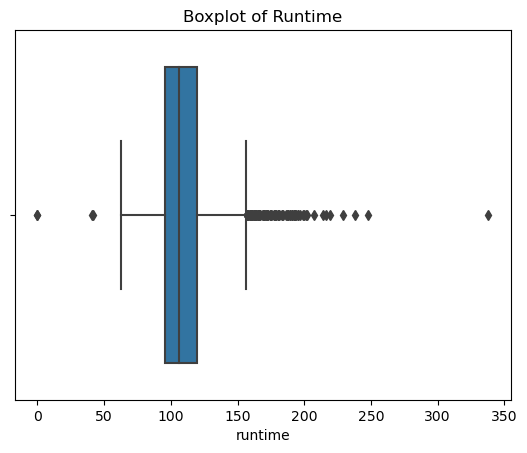

In [37]:
sns.boxplot(x=movies['runtime'])
plt.title('Boxplot of Runtime')

Text(0.5, 1.0, 'Boxplot of Revenue')

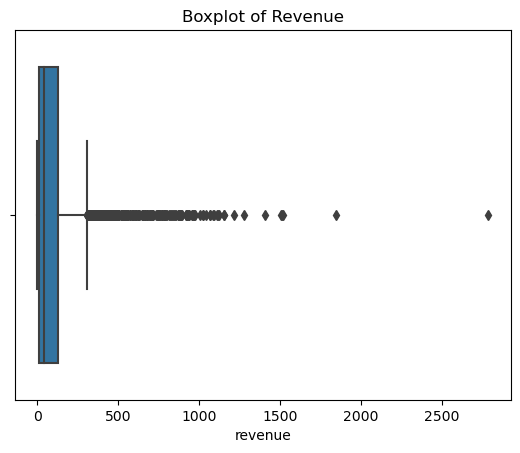

In [38]:
sns.boxplot(x=movies['revenue'])
plt.title('Boxplot of Revenue')

Text(0.5, 1.0, 'Boxplot of Budget')

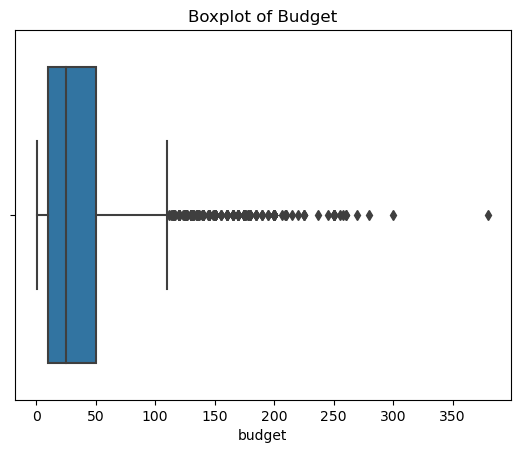

In [40]:
sns.boxplot(x=movies['budget'])
plt.title('Boxplot of Budget')

C:\Users\SREE\AppData\Local\Temp\ipykernel_9976\234912669.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movies.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);


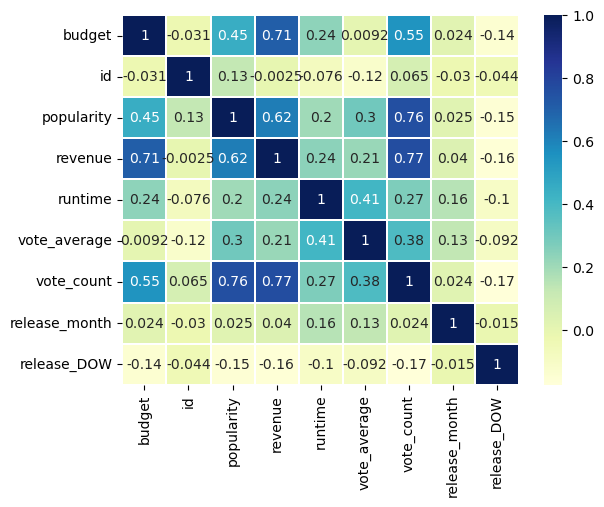

In [41]:
sns.heatmap(movies.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

In [42]:
#creating log transformation for reveune
movies['log_revenue'] = np.log1p(movies['revenue']) #we are not using log0 to avoid & and null value as there might be 0 value
movies['log_budget'] = np.log1p(movies['budget'])

C:\Users\SREE\AppData\Local\Temp\ipykernel_9976\1307848289.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


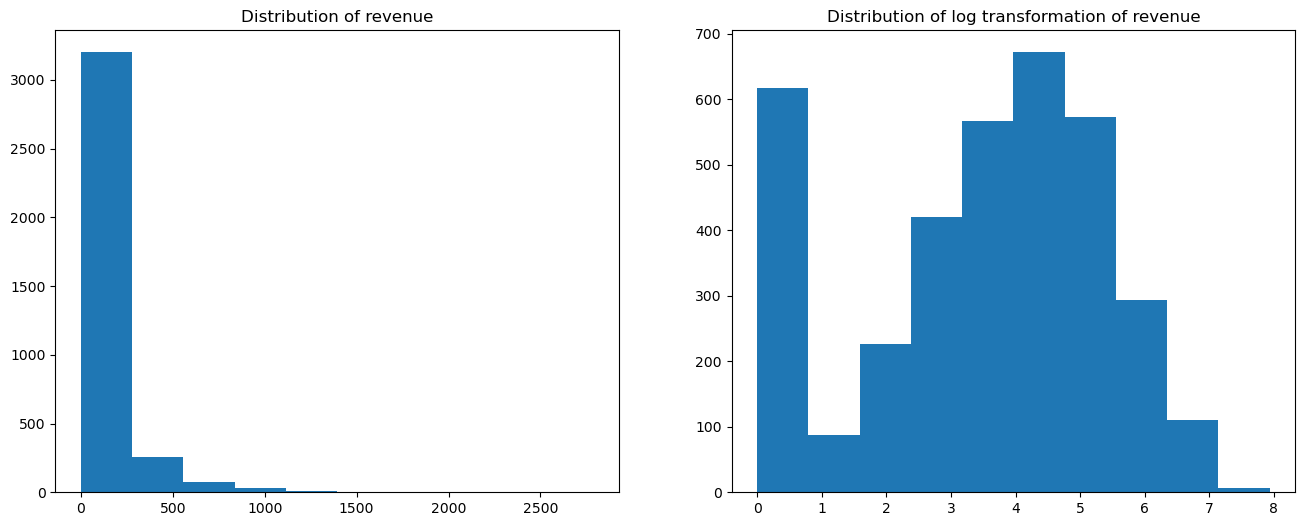

In [43]:
#comapring distribution of reveune and log revune side by side with histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1) 
plt.hist(movies['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(movies['log_revenue']);
plt.title('Distribution of log transformation of revenue');

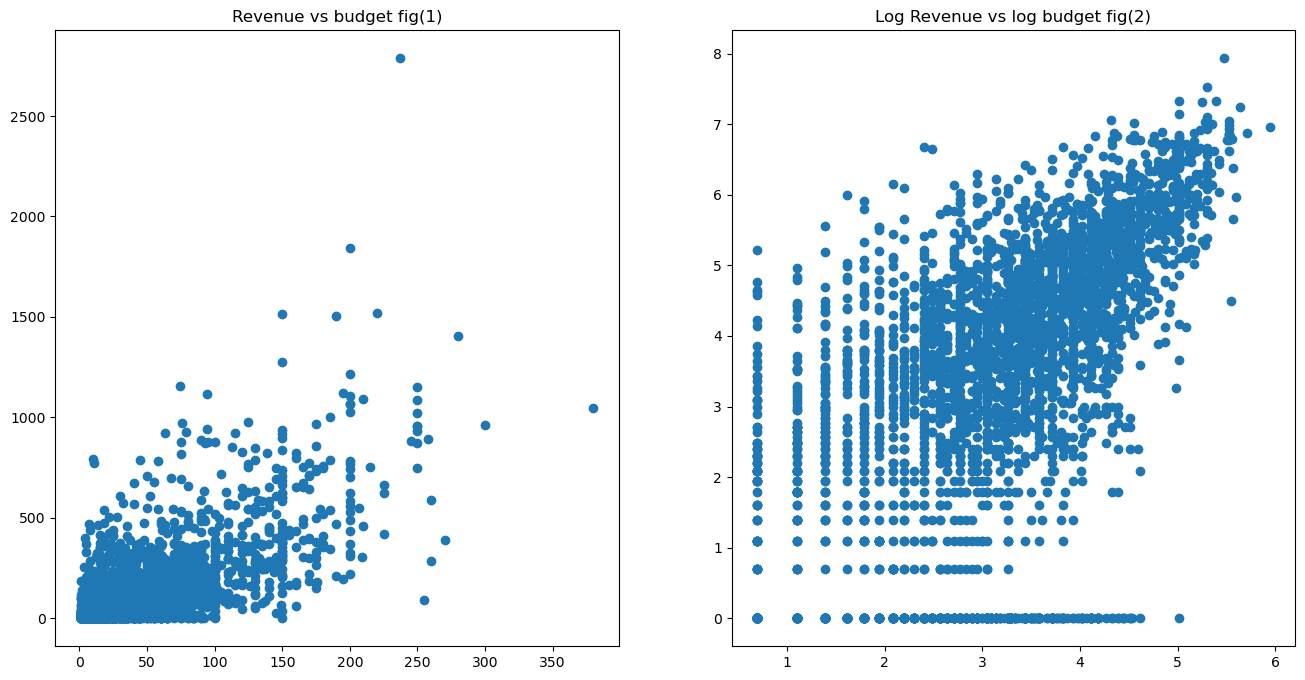

In [44]:
#let's create scatter plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(movies['budget'], movies['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(movies['log_budget'], movies['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

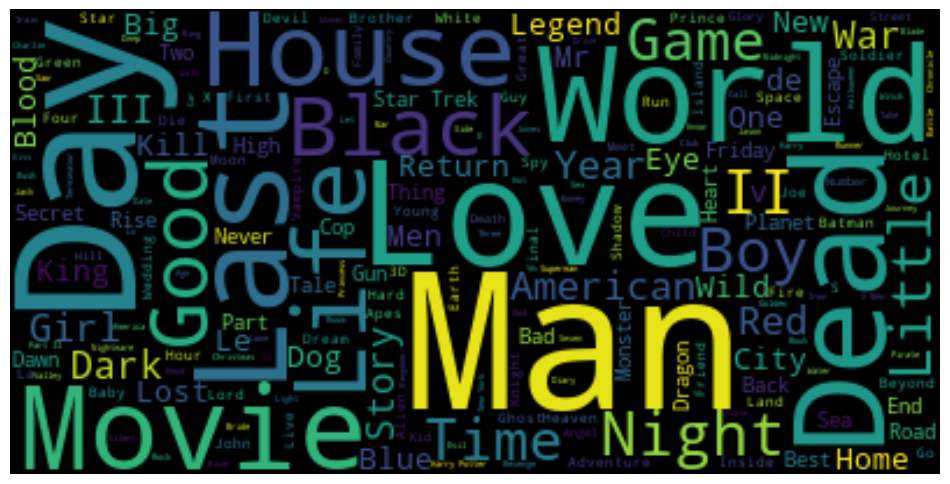

In [45]:
wordcloud = WordCloud().generate(movies.original_title.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

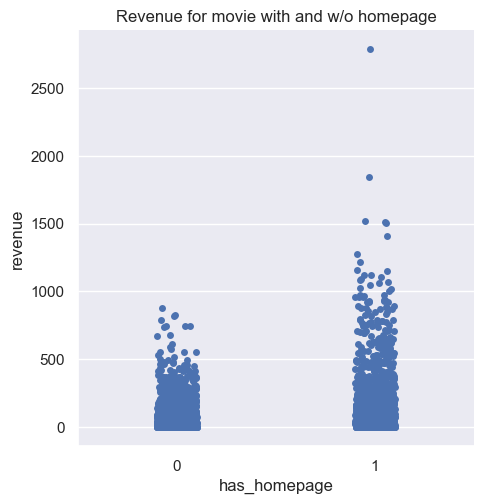

In [46]:
#let's creat column called has_homepage and pass two value 1,0 (1, indicates has home page, 0 indicates no page)
movies['has_homepage'] = 0
movies.loc[movies['homepage'].isnull() == False, 'has_homepage'] = 1 #1 here means it has home page
#since has_homepage is categorical value we will be using seaborn catplot.
sns.catplot(x='has_homepage', y='revenue', data=movies);
plt.title('Revenue for movie with and w/o homepage');

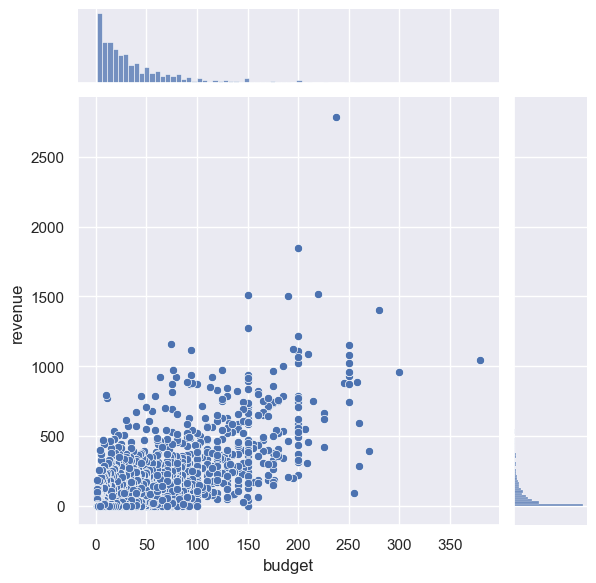

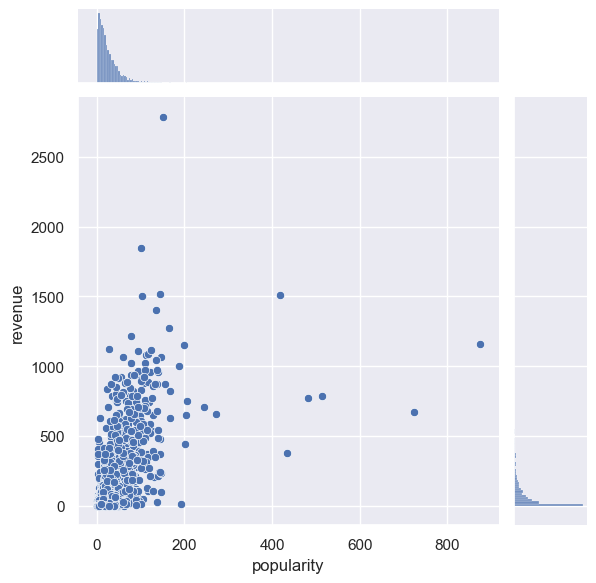

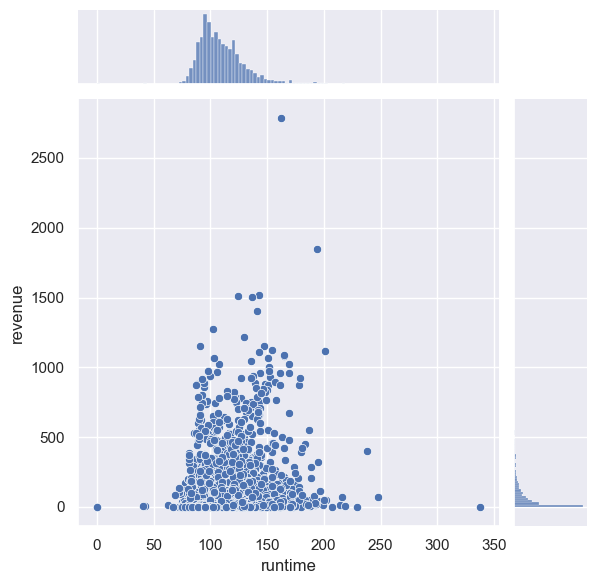

In [47]:
sns.jointplot(data=movies,x='budget', y='revenue');
sns.jointplot(data=movies,x='popularity', y='revenue');
sns.jointplot(data=movies,x='runtime', y='revenue');
plt.show()

Text(0.5, 1.0, 'revenue')

<Figure size 1500x800 with 0 Axes>

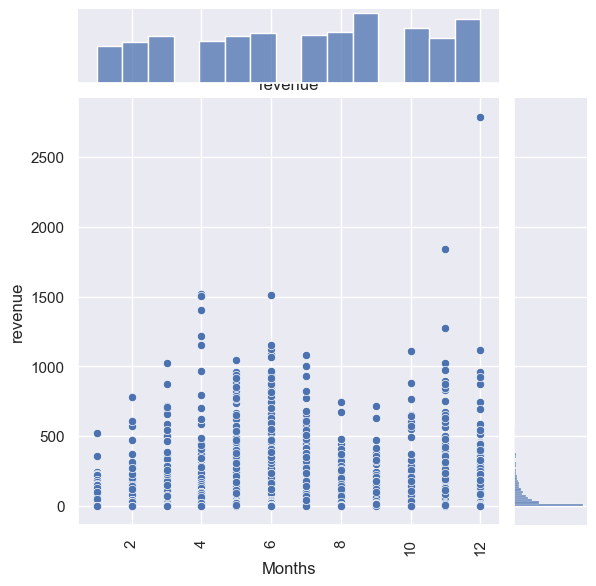

In [49]:
plt.figure(figsize=(15,8))
sns.jointplot(data=movies,x='release_month', y='revenue');
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.title('revenue')

In [50]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4758
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3577 non-null   int64         
 1   genres                3577 non-null   object        
 2   homepage              1412 non-null   object        
 3   id                    3577 non-null   int64         
 4   keywords              3577 non-null   object        
 5   original_language     3577 non-null   object        
 6   original_title        3577 non-null   object        
 7   overview              3577 non-null   object        
 8   popularity            3577 non-null   float64       
 9   production_companies  3577 non-null   object        
 10  production_countries  3577 non-null   object        
 11  release_date          3577 non-null   datetime64[ns]
 12  revenue               3577 non-null   int64         
 13  runtime           

In [51]:
movies_box = movies.drop(['homepage','id','keywords','original_language','original_title','overview','production_companies',
                     'production_countries','release_date','spoken_languages','status','tagline','title_x','title_y',
                     'log_revenue','log_budget','has_homepage'],axis = 1)

In [52]:
movies_box.isnull().sum()

budget           0
genres           0
popularity       0
revenue          0
runtime          0
vote_average     0
vote_count       0
cast             0
director         4
release_month    0
release_DOW      0
dtype: int64

In [53]:

movies_box.dtypes

budget             int64
genres            object
popularity       float64
revenue            int64
runtime          float64
vote_average     float64
vote_count         int64
cast              object
director          object
release_month      int64
release_DOW        int64
dtype: object

In [54]:
movies_box.head()

,budget,genres,popularity,revenue,runtime,vote_average,vote_count,cast,director,release_month,release_DOW
0,237,Action,150.437577,2787,162.0,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",James Cameron,12,3
1,300,Adventure,139.082615,961,169.0,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Gore Verbinski,5,5
2,245,Action,107.376788,880,148.0,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Sam Mendes,10,0
3,250,Action,112.312950,1084,165.0,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christopher Nolan,7,0
4,260,Action,43.926995,284,132.0,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Andrew Stanton,3,2


In [55]:
# Label encoding features to change categorical variables into numerical one
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
cat=['director','genres']
for i in movies_box[cat]:#looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()#creating an object of LabelEncoder
    print(c(movies_box[i])) #getting the classes values before transformation
    movies_box[i] = LE.fit_transform(movies_box[i]) # trannsforming our text classes to numerical values
    print(c(movies_box[i])) #getting the classes values after transformation

LABEL ENCODING OF: director
Counter({'Steven Spielberg': 27, 'Clint Eastwood': 19, 'Ridley Scott': 16, 'Martin Scorsese': 16, 'Woody Allen': 16, 'Steven Soderbergh': 15, 'Renny Harlin': 15, 'Robert Rodriguez': 15, 'Tim Burton': 14, 'Oliver Stone': 14, 'Robert Zemeckis': 13, 'Michael Bay': 12, 'Ron Howard': 12, 'Joel Schumacher': 12, 'Tony Scott': 12, 'Brian De Palma': 12, 'Francis Ford Coppola': 12, 'Barry Levinson': 11, 'Bobby Farrelly': 11, 'David Fincher': 10, 'Shawn Levy': 10, 'Richard Donner': 10, 'Chris Columbus': 10, 'Paul W.S. Anderson': 10, 'Rob Reiner': 10, 'Joel Coen': 10, 'Wes Craven': 10, 'Kevin Smith': 10, 'Richard Linklater': 10, 'Sam Raimi': 9, 'Peter Jackson': 9, 'Rob Cohen': 9, 'M. Night Shyamalan': 9, 'John McTiernan': 9, 'Spike Lee': 9, 'John Carpenter': 9, 'Christopher Nolan': 8, 'Bryan Singer': 8, 'Brett Ratner': 8, 'Martin Campbell': 8, 'Roland Emmerich': 8, 'Quentin Tarantino': 8, 'Simon West': 8, 'Dennis Dugan': 8, 'Adam Shankman': 8, 'F. Gary Gray': 8, 'Antoin

In [56]:
mapping_dict ={} 
category_col=["director","genres"]
for col in category_col: 
    LE_name_mapping = dict(zip(LE.classes_, 
                        LE.transform(LE.classes_))) 
  
    mapping_dict[col]= LE_name_mapping 
    print(mapping_dict)

{'director': {'': 0, 'Action': 1, 'Adventure': 2, 'Animation': 3, 'Comedy': 4, 'Crime': 5, 'Documentary': 6, 'Drama': 7, 'Family': 8, 'Fantasy': 9, 'History': 10, 'Horror': 11, 'Music': 12, 'Mystery': 13, 'Romance': 14, 'Science Fiction': 15, 'TV Movie': 16, 'Thriller': 17, 'War': 18, 'Western': 19}}
{'director': {'': 0, 'Action': 1, 'Adventure': 2, 'Animation': 3, 'Comedy': 4, 'Crime': 5, 'Documentary': 6, 'Drama': 7, 'Family': 8, 'Fantasy': 9, 'History': 10, 'Horror': 11, 'Music': 12, 'Mystery': 13, 'Romance': 14, 'Science Fiction': 15, 'TV Movie': 16, 'Thriller': 17, 'War': 18, 'Western': 19}, 'genres': {'': 0, 'Action': 1, 'Adventure': 2, 'Animation': 3, 'Comedy': 4, 'Crime': 5, 'Documentary': 6, 'Drama': 7, 'Family': 8, 'Fantasy': 9, 'History': 10, 'Horror': 11, 'Music': 12, 'Mystery': 13, 'Romance': 14, 'Science Fiction': 15, 'TV Movie': 16, 'Thriller': 17, 'War': 18, 'Western': 19}}


In [57]:
movies_box.head()

,budget,genres,popularity,revenue,runtime,vote_average,vote_count,cast,director,release_month,release_DOW
0,237,1,150.437577,2787,162.0,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",616,12,3
1,300,2,139.082615,961,169.0,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",536,5,5
2,245,1,107.376788,880,148.0,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",1345,10,0
3,250,1,112.312950,1084,165.0,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",245,7,0
4,260,1,43.926995,284,132.0,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",65,3,2


In [76]:
#inDependent Variables
x=movies_box.iloc[:,[0,1,2,4,5,6,7,8,9,10]]
x=pd.DataFrame(x,columns=['budget','genres','popularity','runtime','vote_average','vote_count','director'
                          ,'release_month','release_DOW'])
x

,budget,genres,popularity,runtime,vote_average,vote_count,director,release_month,release_DOW
0,237,1,150.437577,162.0,7.2,11800,616,12,3
1,300,2,139.082615,169.0,6.9,4500,536,5,5
2,245,1,107.376788,148.0,6.3,4466,1345,10,0
3,250,1,112.312950,165.0,7.6,9106,245,7,0
4,260,1,43.926995,132.0,6.1,2124,65,3,2
...,...,...,...,...,...,...,...,...,...
4586,35,4,38.100488,99.0,5.8,923,1534,5,2
4596,6,11,19.331884,89.0,6.0,316,468,12,2
4682,13,11,4.009379,95.0,4.6,24,446,1,4
4720,8,7,9.452808,120.0,6.5,178,1085,9,4


In [77]:
#Dependent Variables
y=movies_box.iloc[:,3]
y=pd.DataFrame(y,columns=['revenue'])
y

,revenue
0,2787
1,961
2,880
3,1084
4,284
...,...
4586,170
4596,0
4682,0
4720,15


In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 4.61364095, -1.10874915,  3.53354669, ..., -0.46377267,
         1.4888882 , -0.11376704],
       [ 6.08098572, -0.88283085,  3.2088307 , ..., -0.63350238,
        -0.5744432 ,  1.3934355 ],
       [ 4.79997045, -1.10874915,  2.30214435, ...,  1.08288931,
         0.89936495, -2.37457084],
       ...,
       [-0.60358489,  1.15043382, -0.65383654, ..., -0.8244483 ,
        -1.75348971,  0.63983423],
       [-0.72004082,  0.24676063, -0.49817169, ...,  0.53126775,
         0.60460332,  0.63983423],
       [-0.81320557,  2.50594361,  0.0225735 , ...,  1.62390276,
        -1.16396645,  1.3934355 ]])

In [79]:
pickle.dump(sc,open("scalar_movies.pkl","wb"))

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [81]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [82]:
x_test

array([[ 0.56097445, -1.10874915,  2.21444372, ...,  0.1790786 ,
        -1.16396645, -1.62096957],
       [ 0.95692463, -0.43099426, -0.44855938, ..., -0.83717803,
         1.4888882 ,  1.3934355 ],
       [-0.83649675, -0.43099426, -0.46086051, ...,  1.4499298 ,
         0.89936495,  0.63983423],
       ...,
       [ 0.49110089, -0.88283085, -0.30299216, ...,  1.51570007,
        -0.27968157, -0.8673683 ],
       [-0.78991438, -0.43099426, -0.21553317, ..., -1.26574555,
        -1.75348971,  0.63983423],
       [-0.25421709, -0.65691256,  1.89049921, ...,  1.02136229,
         1.19412658, -0.8673683 ]])

In [83]:
y_test[0:5]

,revenue
634,463
458,201
3937,2
2765,16
2237,10


In [84]:
y_pred_mr=mr.predict(x_test)
y_pred_mr[0:5]

array([[701.19552524],
       [129.79457499],
       [  3.29586379],
       [  8.56941944],
       [ 19.49042463]])

In [85]:
y_test


,revenue
634,463
458,201
3937,2
2765,16
2237,10
...,...
1420,93
3343,161
706,157
3605,16


In [86]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_mr))
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred_mr)))

MAE: 61.382132155220724
RMSE: 7.834674987210429


In [87]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mr)

0.6945997129106318

In [88]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs = -1, random_state = 42)
rf.fit(x_train, y_train)
y_pred_mr=mr.predict(x_test)
r2_score(y_test,y_pred_mr)

C:\Users\SREE\AppData\Local\Temp\ipykernel_9976\2465732484.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


0.6945997129106318

In [89]:
import pickle
pickle.dump(mr,open("model_movies.pkl","wb"))

In [90]:
model=pickle.load(open("model_movies.pkl","rb"))
scalar=pickle.load(open("scalar_movies.pkl","rb"))

In [91]:
input=[[50,8,20.239061,88,5,366,719,7,3]]
input=scalar.transform(input)
prediction = model.predict(input)

C:\Users\SREE\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [92]:
prediction

array([[87.53806583]])

In [93]:
mr.score(x_test,y_test)

0.6945997129106318